In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.stats import norm, ttest_ind, shapiro

In [68]:
data = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ROSSTAT')

data = data.iloc[24:37]
data = data.iloc[:, :13]
data = data.drop(data.columns[[1,2,3,4,5,6]], axis=1)
data = data.dropna()
data.columns = ['Название области', '2005', '2010', '2015','2019', '2020', '2021' ]
data.set_index('Название области', inplace=True)

data = data.astype(float).copy()

pd.set_option('display.width', 120)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(data)

                                              2005  2010  2015  2019  2020  2021
Название области                                                                
Республика Карелия                            50.5  50.4  48.4  51.7  52.9  53.5
Республика Коми                               45.0  47.5  48.4  51.4  51.0  50.1
Архангельская область                         53.2  56.6  53.2  55.5  54.9  55.5
Ненецкий автономный округ                     39.1  44.4  46.5  51.5  51.1  53.2
Архангельская область без автономного округа  53.7  57.0  53.5  55.6  55.0  55.6
Вологодская область                           35.3  34.6  35.2  35.5  36.1  35.7
Калининградская область                       35.7  34.5  44.6  46.5  46.6  48.4
Ленинградская область                         30.6  34.4  33.6  37.1  37.1  38.1
Мурманская область                            50.1  57.4  53.3  51.7  51.1  51.0
Новгородская область                          39.2  41.3  43.0  43.4  42.5  43.2
Псковская область           

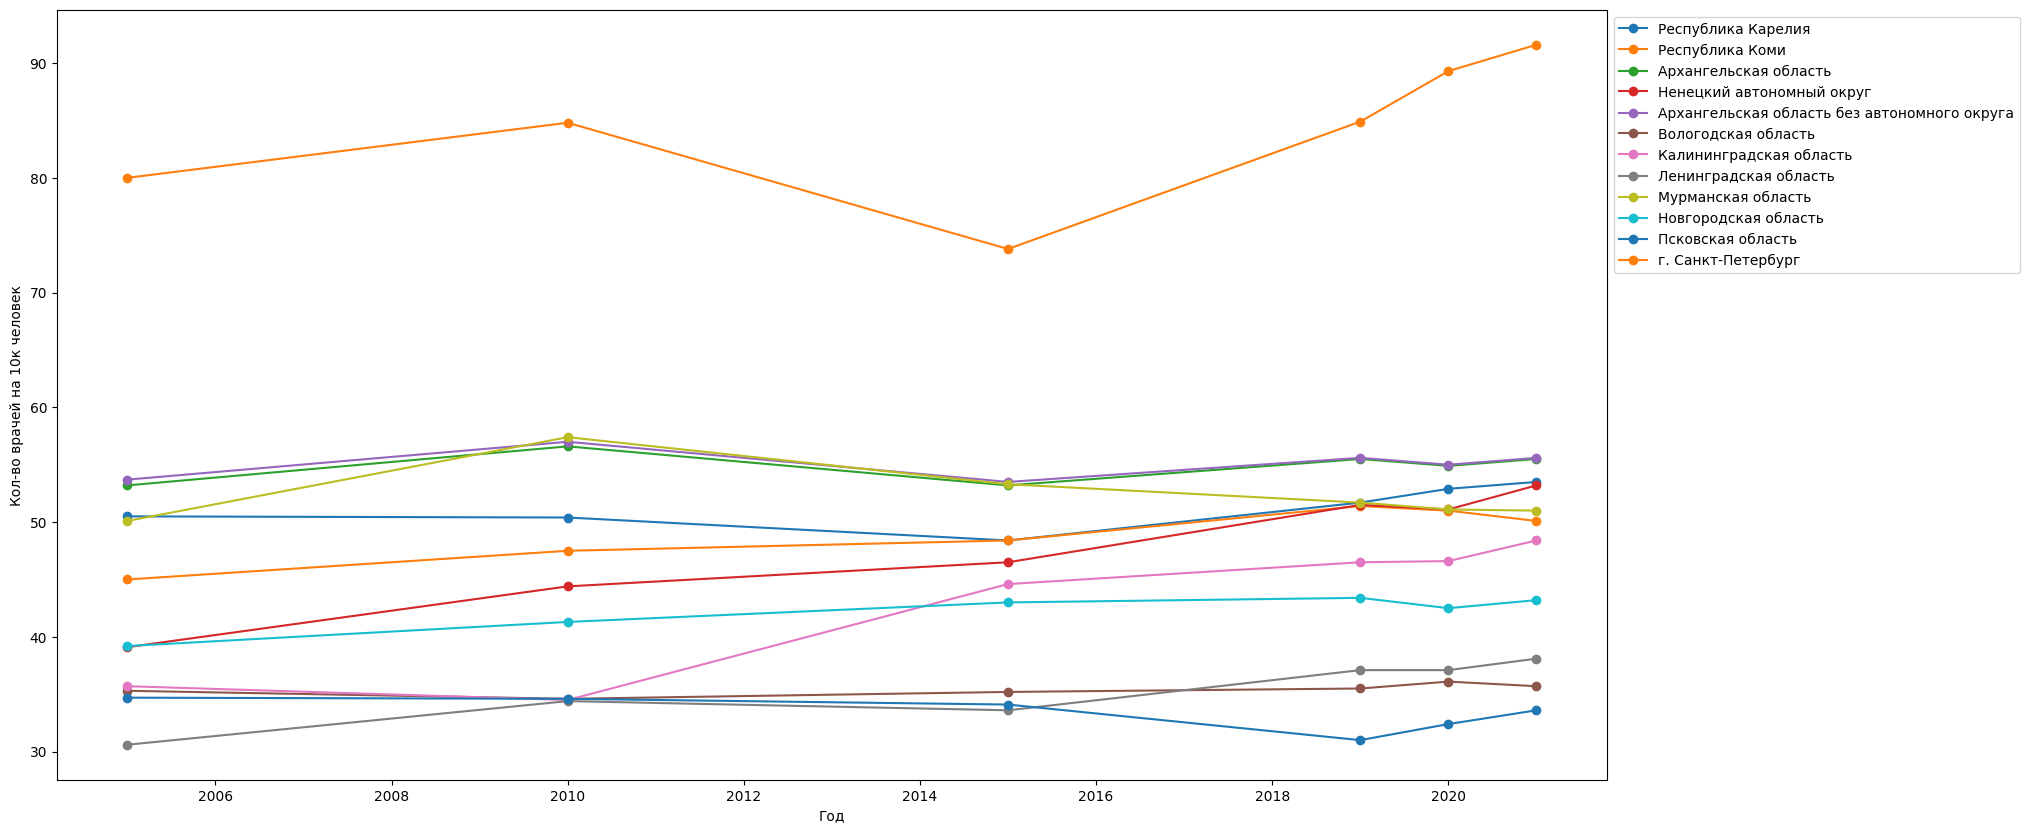

In [69]:
plt.figure(figsize=(20, 10))
years = [2005, 2010, 2015, 2019, 2020, 2021]
for i in range(len(data.index)):
    y = data.iloc[i]
    plt.plot(years, y, marker='o')
    plt.xlabel('Год')
    plt.ylabel('Кол-во врачей на 10к человек') 

plt.legend(data.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

2. Визуализировать данные показателя X в каждый год периода T по указанному в
Вашем варианте Федеральному Округу с помощью графиков и боксплотов.

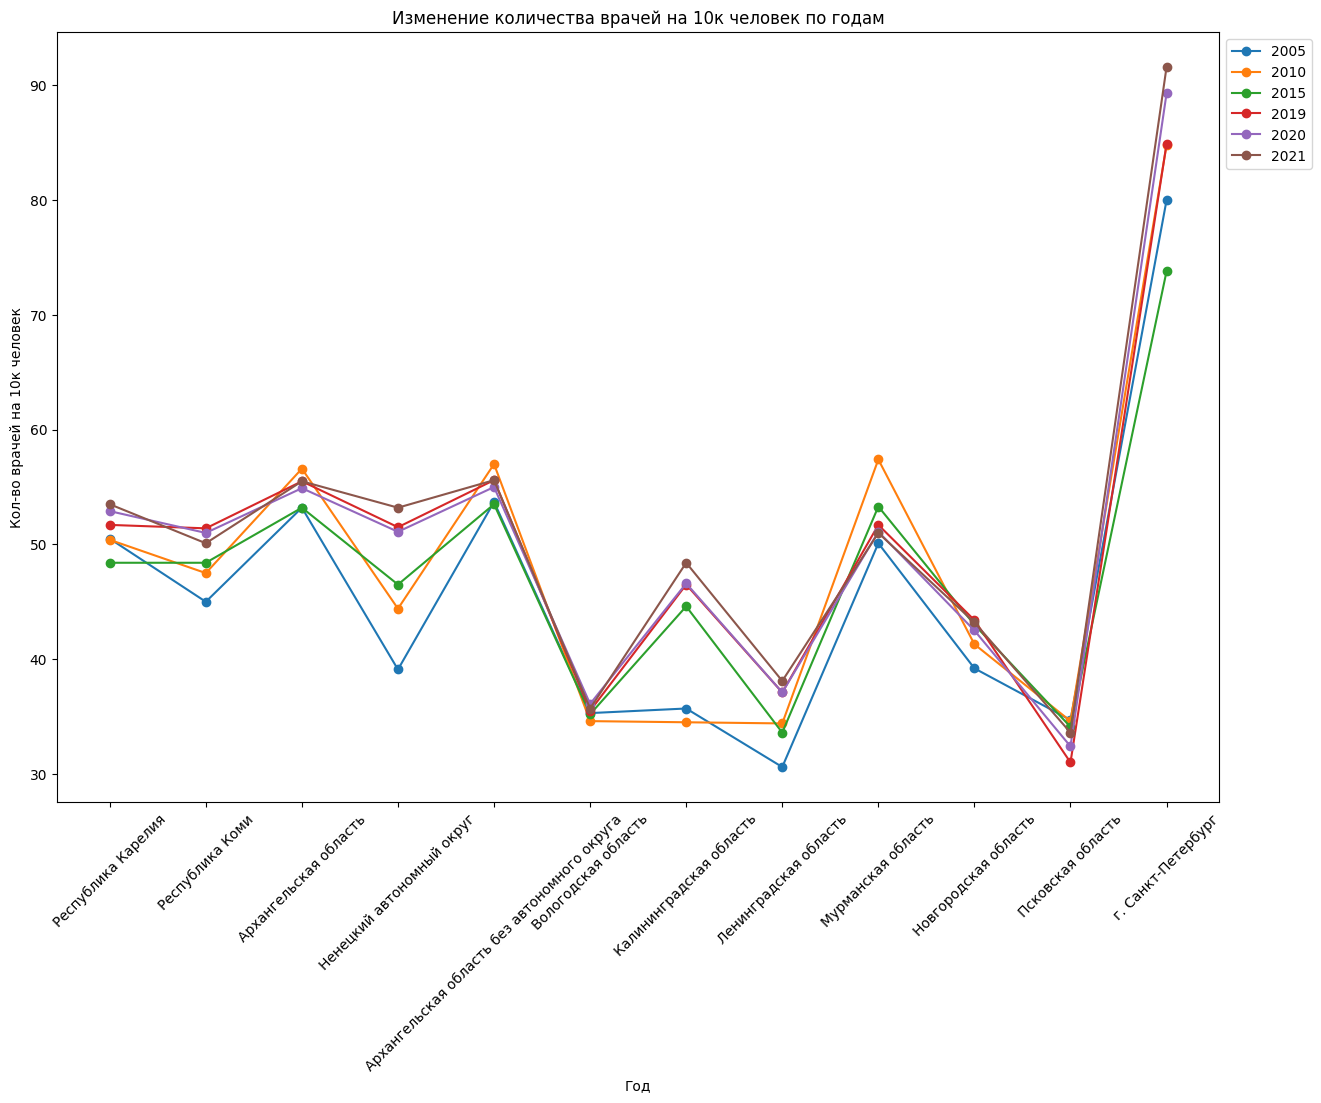

In [70]:
plt.figure(figsize=(15, 10))
cities = data.index

for i in range(len(data.columns)):
    y = data.iloc[:, i]
    plt.plot(cities, y, marker='o', label=data.columns[i])

plt.xlabel('Год')
plt.ylabel('Кол-во врачей на 10к человек')
plt.title('Изменение количества врачей на 10к человек по годам')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


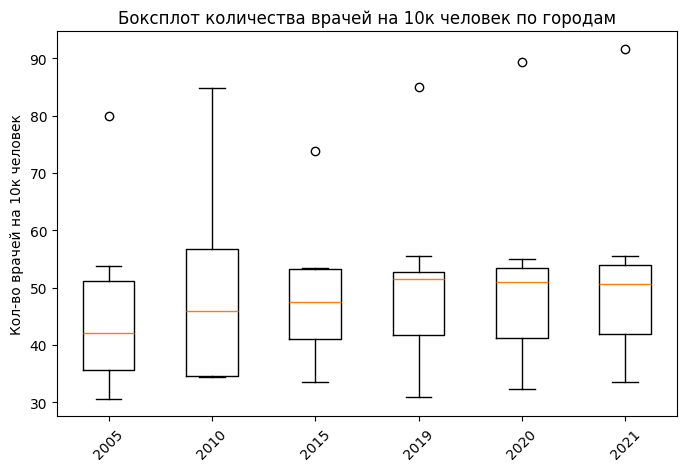

In [71]:
# Построение боксплота
plt.figure(figsize=(8, 5))
plt.boxplot([data.iloc[:, i] for i in range(len(data.columns))], labels=data.columns)
plt.title('Боксплот количества врачей на 10к человек по городам')
plt.ylabel('Кол-во врачей на 10к человек')
plt.xticks(rotation=45)

plt.show()

3. Вычислить описательную статистику: среднее, стандартное отклонение, квартили,
минимальное и максимальное значения показателя X в каждый год периода T по
указанному в Вашем варианте Федеральному Округу.

In [72]:
for i in range(0, 6):
    print(data.iloc[:, i].describe(),"\n")

count    12.000000
mean     45.591667
std      13.424771
min      30.600000
25%      35.600000
50%      42.100000
75%      51.175000
max      80.000000
Name: 2005, dtype: float64 

count    12.000000
mean     48.125000
std      14.732655
min      34.400000
25%      34.600000
50%      45.950000
75%      56.700000
max      84.800000
Name: 2010, dtype: float64 

count    12.000000
mean     47.300000
std      11.072817
min      33.600000
25%      41.050000
50%      47.450000
75%      53.225000
max      73.800000
Name: 2015, dtype: float64 

count    12.000000
mean     49.650000
std      13.756354
min      31.000000
25%      41.825000
50%      51.450000
75%      52.650000
max      84.900000
Name: 2019, dtype: float64 

count    12.000000
mean     50.000000
std      14.593024
min      32.400000
25%      41.150000
50%      51.050000
75%      53.400000
max      89.300000
Name: 2020, dtype: float64 

count    12.000000
mean     50.791667
std      14.990934
min      33.600000
25%      41.925000


4. Проверить, можно ли считать, что распределение случайной величины X в указанном
Федеральном Округе в каждый год периода Т подчинено нормальному закону
распределения. Использовать для проверки тест Шапиро-Уилка (уровень значимости ALPHA указан в Вашем варианте)

In [73]:
ALPHA = 0.01  # Уровень значимости

normal_columns = list()
not_normal_columns = list()

for i in range(0, 6):
    # Проведение теста Шапиро-Уилка
    stat, p_value = stats.shapiro(data.iloc[:, i])

    # Вывод результатов
    print(f"Результаты теста Шапиро-Уилка - {i}:")
    print(f"Статистика теста: {stat:.4f}")
    print(f"P-значение: {p_value:.4f}")


    # Проверка гипотезы
    # H0: CFD - Нормальное распределение
    # H1: CFD - НЕ нормальное распределение
    if p_value > ALPHA:
        print(f"Гипотеза о нормальности НЕ отвергается на уровне значимости {ALPHA}.")
        print("Распределение можно считать нормальным.")
        normal_columns.append(i)
    else:
        print(f"Гипотеза о нормальности отвергается на уровне значимости {ALPHA}.")
        print("Распределение нельзя считать нормальным.")
        not_normal_columns.append(i)

    print("\n")
    
print(normal_columns)
print(not_normal_columns)


Результаты теста Шапиро-Уилка - 0:
Статистика теста: 0.8523
P-значение: 0.0391
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.01.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 1:
Статистика теста: 0.8440
P-значение: 0.0310
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.01.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 2:
Статистика теста: 0.8945
P-значение: 0.1347
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.01.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 3:
Статистика теста: 0.8599
P-значение: 0.0488
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.01.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 4:
Статистика теста: 0.8145
P-значение: 0.0138
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.01.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 5:
Статистика теста: 0.8031
P-зна

5. Выделить те года t1-tm с нормально распределенными значениями рядов данных Xt1-
Xtm, где Xt1- Xtm имеют одинаковую дисперсию (уровень значимости взять равным ALPHA).
Использовать для проверки нулевой гипотезы о равенстве дисперсий тесты Бартлетта и
Левена.

In [74]:
# H0: D(0) = D(1)
# H1: D(0) != D(1)
import itertools
columns = data.columns[normal_columns]
pairs = itertools.combinations(columns, 2)
for col1, col2 in pairs:
    group_1 = data[col1]
    group_2 = data[col2]
    
    bartlett_stat, bartlett_p_value = stats.bartlett(group_1, group_2)
    print(f'Бартлетт (столбцы {col1} и {col2}): stat = {bartlett_stat:.4f}, p-value = {bartlett_p_value:.4f}')
    if bartlett_p_value > ALPHA:
        print(f"\tГипотеза H0 о равенстве дисперсий принимается.\n")
    else:
        print(f"\tГипотеза H0 отвергается. Дисперсии значимо различаются.\n")

    levene_stat, levene_p_value = stats.levene(group_1, group_2)
    print(f'Левен (столбцы {col1} и {col2}): stat = {levene_stat:.4f}, p-value = {levene_p_value:.4f}')
    if levene_p_value > ALPHA:
        print(f"\tГипотеза H0 о равенстве дисперсий принимается.\n")
    else:
        print(f"\tГипотеза H0 отвергается. Дисперсии значимо различаются.\n")

    print('---------------------------------------------------------------')

Бартлетт (столбцы 2005 и 2010): stat = 0.0908, p-value = 0.7632
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2010): stat = 0.0657, p-value = 0.8001
	Гипотеза H0 о равенстве дисперсий принимается.

---------------------------------------------------------------
Бартлетт (столбцы 2005 и 2015): stat = 0.3879, p-value = 0.5334
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2015): stat = 0.3406, p-value = 0.5654
	Гипотеза H0 о равенстве дисперсий принимается.

---------------------------------------------------------------
Бартлетт (столбцы 2005 и 2019): stat = 0.0063, p-value = 0.9369
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2019): stat = 0.0602, p-value = 0.8084
	Гипотеза H0 о равенстве дисперсий принимается.

---------------------------------------------------------------
Бартлетт (столбцы 2005 и 2020): stat = 0.0732, p-value = 0.7868
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2020

6. Проверить, можно ли считать, что среднее значение показателя X по данному
Федеральному Округу в каждый год периода t1-tm значимо выше (ниже)
общероссийского значения показателя X (уровень значимости взять равным ALPHA).
Общероссийские значения показателя X найти в файле CHISLO_DOCTORS.xlsx.
Использовать для проверки гипотезы о равенстве средних t-тест для одной выборки

In [75]:
df = pd.read_excel("CHISLO_DOCTORS.xlsx",sheet_name='ROSSTAT')

df_RU = df.iloc[[3], 7:13]
df_RU.columns = ['2005', '2010','2015','2019', '2020', '2021' ]
df_RU.insert(0, 'Название', ['РФ'])
df_RU.set_index("Название", inplace=True)

print(df_RU)

          2005  2010  2015  2019  2020  2021
Название                                    
РФ        48.6  50.1  45.9  48.7  50.4  51.0


In [76]:
for i in normal_columns:
    sample = data.iloc[:, i]
    sample_mean = sample.mean()
    ru_mean = df_RU.iloc[0, i]
    if sample_mean < ru_mean: 
        # H0 : sample = ru_mean
        # H1 : sample < ru_mean
        t_statistic, p_value = stats.ttest_1samp(sample, ru_mean, alternative="less")
        print(p_value)
        if p_value < ALPHA:
            print("Среднее значение выборки статистически меньше среднего по РФ")
        else:
            print("Нет статистически значимого различия (меньше)\n")
    else:
        # H0 : sample = ru_mean
        # H1 : sample > ru_mean
        t_statistic, p_value = stats.ttest_1samp(sample, ru_mean, alternative="greater")
        print(p_value)
        if p_value < ALPHA:
            print("Среднее значение выборки статистически больше среднего по РФ")
        else:
            print("Нет статистически значимого различия (больше)\n")
            

0.22698033633905634
Нет статистически значимого различия (меньше)

0.3257144522387731
Нет статистически значимого различия (меньше)

0.33493628375924756
Нет статистически значимого различия (больше)

0.4076640542338475
Нет статистически значимого различия (больше)

0.4630301895918244
Нет статистически значимого различия (меньше)

0.4812331696619716
Нет статистически значимого различия (меньше)



7. Проверить, можно ли считать, что различия между средними значениями показателя
X по данному Федеральному Округу в какие-то два года из периода t1-tm незначимы,
появились случайно (уровень значимости взять равным ALPHA). Использовать для проверки
гипотезы о равенстве средних t-тест для двух выборок.

In [77]:
import itertools
columns = data.columns[normal_columns]
pairs = itertools.combinations(columns, 2)
for col1, col2 in pairs:
    group_1 = data[col1].to_list()
    group_2 = data[col2].to_list()

    mean_1 = data[col1].mean()
    mean_2 = data[col2].mean()

    if mean_1 < mean_2: 
        t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='less')
        if p_value < ALPHA:
            print(f"Среднее значение выборки {col1} статистически меньше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между средними {col1} и {col2} (меньше)")
    else: 
        t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='greater')
        if p_value < ALPHA:
            print(f"Среднее значение выборки {col1} статистически больше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между средними {col1} и {col2} (больше)")
    print(f"Statistic:{t_statistic}")
    print(f"P_value:{p_value}")
    print("************************")

Нет статистически значимого различия между средними 2005 и 2010 (меньше)
Statistic:-0.4402881644185376
P_value:0.33201199532364073
************************
Нет статистически значимого различия между средними 2005 и 2015 (меньше)
Statistic:-0.3400654732190721
P_value:0.36851635416156003
************************
Нет статистически значимого различия между средними 2005 и 2019 (меньше)
Statistic:-0.7313977182790082
P_value:0.23612774703878092
************************
Нет статистически значимого различия между средними 2005 и 2020 (меньше)
Statistic:-0.7701385795366158
P_value:0.22470453856427575
************************
Нет статистически значимого различия между средними 2005 и 2021 (меньше)
Statistic:-0.8951418951593498
P_value:0.19020046245376204
************************
Нет статистически значимого различия между средними 2010 и 2015 (больше)
Statistic:0.1550684286268802
P_value:0.439090647147015
************************
Нет статистически значимого различия между средними 2010 и 2019 (ме

8. Проверить значимость отличий средних в выбранной группе (уровень значимости
взять равным ALPHA). Использовать для проверки гипотезы о равенстве средних групп тест
Тьюки и односторонний тест ANOVA

In [78]:
data2 = []
for column in data.columns[normal_columns]:
    data2.append(data[column])

result = stats.tukey_hsd(*data2)
print(result.pvalue)
print(result)

[[1.         0.99760621 0.99964387 0.97895413 0.96980758 0.93965223]
 [0.99760621 1.         0.99999025 0.99979588 0.99943904 0.99694557]
 [0.99964387 0.99999025 1.         0.9983284  0.9967605  0.9892845 ]
 [0.97895413 0.99979588 0.9983284  1.         0.99999986 0.99995108]
 [0.96980758 0.99943904 0.9967605  0.99999986 1.         0.99999206]
 [0.93965223 0.99694557 0.9892845  0.99995108 0.99999206 1.        ]]
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.533     0.998   -19.099    14.033
 (0 - 2)     -1.708     1.000   -18.274    14.858
 (0 - 3)     -4.058     0.979   -20.624    12.508
 (0 - 4)     -4.408     0.970   -20.974    12.158
 (0 - 5)     -5.200     0.940   -21.766    11.366
 (1 - 0)      2.533     0.998   -14.033    19.099
 (1 - 2)      0.825     1.000   -15.741    17.391
 (1 - 3)     -1.525     1.000   -18.091    15.041
 (1 - 4)     -1.875     0.999   -18.441    14.691
 (1 - 5)     -2.6

In [79]:
data2 = []
for column in data.columns[normal_columns]:
    data2.append(data[column])

statistic, p_value = stats.f_oneway(*data2)
print(statistic, p_value)
if p_value < ALPHA:
    print(f"Существенные статистические различия между средними выборок")
else:
    print(f"Нет статистически значимого различия между средними выборок")

0.23641937634220928 0.9450696557742952
Нет статистически значимого различия между средними выборок
